In [1]:
%load_ext autoreload
%autoreload 2

# Hyperparameters

In [2]:
v_dim = 320 # 20 * 16
h_dim = 100

# Load AlphaDigit Data

In [3]:
from utils import *

In [4]:
dataset = read_alpha_digit('./data/binaryalphadigs.mat', labels=[3])

In [5]:
dataset[0].shape

(39, 320)

# Build RBM model

In [46]:
from model.RBM import RBM
rbm = RBM(v_dim=320, h_dim=100)

# Train

In [47]:
rbm.fit(dataset[0], lr=0.1, batch_size=1, num_epochs=100)

100%|██████████| 100/100 [00:04<00:00, 24.06epochs/s, l2_loss=0.0136]


# Generation

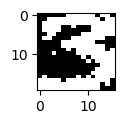

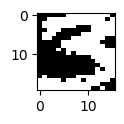

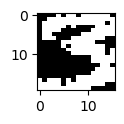

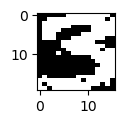

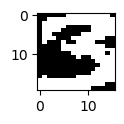

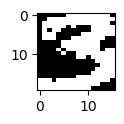

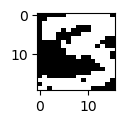

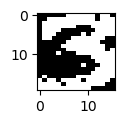

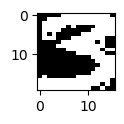

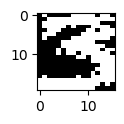

In [48]:
from utils import *
generate_image(rbm, 10, 10)

# DBN

## sanity check (1 layer DBN reduces to RBM)

In [21]:
from model.DBN import DBN
dbn = DBN(v_dim=320, h_dims=[100])

In [22]:
dbn.fit(dataset[0], batch_size=1, num_epochs=100)

layer 0: 100%|██████████| 100/100 [00:04<00:00, 23.46epochs/s, l2_loss=0.0134]


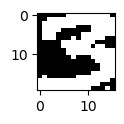

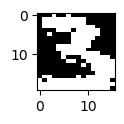

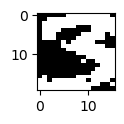

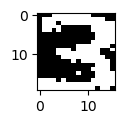

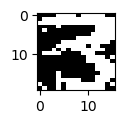

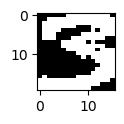

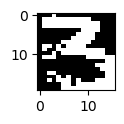

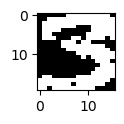

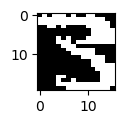

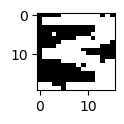

In [23]:
generate_image(dbn, 10, 10)

In [49]:
dbn_2 = DBN(v_dim=320, h_dims=[100, 50])

In [50]:
dbn_2.fit(dataset[0], batch_size=1, num_epochs=100)

layer 1: 100%|██████████| 100/100 [00:01<00:00, 52.41epochs/s, l2_loss=0.0149]


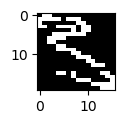

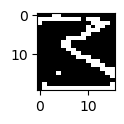

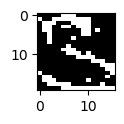

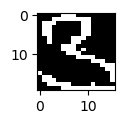

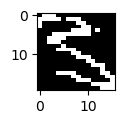

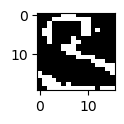

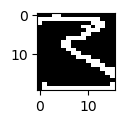

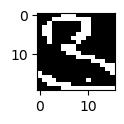

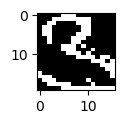

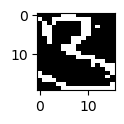

In [26]:
generate_image(dbn_2, 10, 10)

layer 2: 100%|██████████| 100/100 [00:01<00:00, 56.04epochs/s, l2_loss=0.0626]


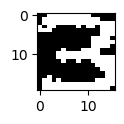

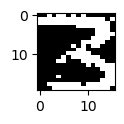

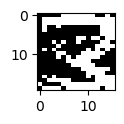

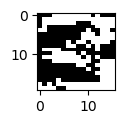

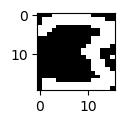

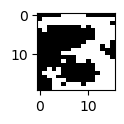

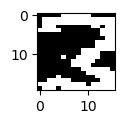

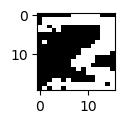

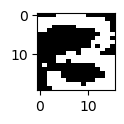

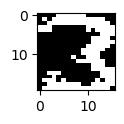

In [27]:
dbn_3 = DBN(v_dim=320, h_dims=[100, 50, 25])
dbn_3.fit(dataset[0], batch_size=1, num_epochs=100)
generate_image(dbn_3, 10, 10)

layer 3: 100%|██████████| 100/100 [00:01<00:00, 55.94epochs/s, l2_loss=0.12]


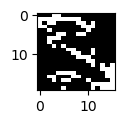

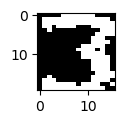

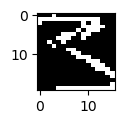

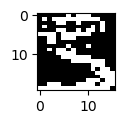

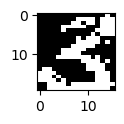

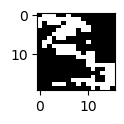

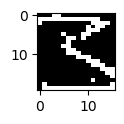

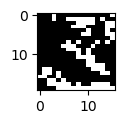

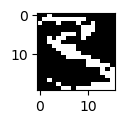

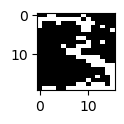

In [28]:
dbn_3 = DBN(v_dim=320, h_dims=[100, 50, 25, 10])
dbn_3.fit(dataset[0], batch_size=1, num_epochs=100)
generate_image(dbn_3, 10, 10)

In [30]:
%load_ext viztracer

In [36]:
all_data = read_alpha_digit('./data/binaryalphadigs.mat', labels=range(36))

In [38]:
rbm = RBM(v_dim=320, h_dim=100)

In [40]:
%%viztracer --port
rbm.fit(all_data[0])

100%|██████████| 100/100 [00:34<00:00,  2.89epochs/s, l2_loss=0.111]


Button(description='VizTracer Report', style=ButtonStyle())

Error! Port 9001 is already in use, try another port with "--port"
Error! Port 9001 is already in use, try another port with "--port"


In [45]:
%%viztracer --port 8888
print(1)

1


Button(description='VizTracer Report', style=ButtonStyle())

Error! Port 9001 is already in use, try another port with "--port"
Error! Port 9001 is already in use, try another port with "--port"
